In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
train_df = pd.read_csv('/Users/krishnabansal/Appreciate Wealth/Dataset/fraudTrain.csv')
test_df = pd.read_csv('/Users/krishnabansal/Appreciate Wealth/Dataset/fraudTest.csv')

In [90]:
train_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [91]:
test_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [92]:
fraud_values_check = train_df[train_df['is_fraud']==1]
fraud_values_check

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295399,1295399,2020-06-21 01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,a83b093f0c1d9068fa0089f7c722615f,1371776408,26.888686,-80.834389,1
1295491,1295491,2020-06-21 01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,f75b35bed13b9e692f170dba45a15b21,1371779615,28.216707,-79.855648,1
1295532,1295532,2020-06-21 02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,a0ba2472cd3fc9731f2a18d3f308f5c3,1371781016,29.700456,-91.361632,1
1295666,1295666,2020-06-21 03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,daa281350b1e16093c7b4bf97bf4d6ed,1371785180,32.675272,-103.484949,1


In [93]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [94]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [95]:
print(train_df.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [96]:
print(test_df.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [97]:
num_duplicates_train = train_df.duplicated().sum()
print(f"Number of duplicate rows in training dataset: {num_duplicates_train}")

Number of duplicate rows in training dataset: 0


In [98]:
num_duplicates_test = test_df.duplicated().sum()
print(f"Number of duplicate rows in testing dataset: {num_duplicates_test}")

Number of duplicate rows in testing dataset: 0


In [99]:
train_df = train_df.drop(columns=['Unnamed: 0','first','last','street','job','unix_time','city'])
test_df = test_df.drop(columns=['Unnamed: 0','first','last','street','job','unix_time','city'])

In [100]:
train_df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,zip,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,28654,36.0788,-81.1781,3495,1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,99160,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,ID,83252,42.1808,-112.2620,4154,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,59632,46.2306,-112.1138,1939,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,VA,24433,38.4207,-79.4629,99,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,UT,84735,37.7175,-112.4777,258,1961-11-24,440b587732da4dc1a6395aba5fb41669,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,MD,21790,39.2667,-77.5101,100,1979-12-11,278000d2e0d2277d1de2f890067dcc0a,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,NM,88325,32.9396,-105.8189,899,1967-08-30,483f52fe67fabef353d552c1e662974c,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,SD,57756,43.3526,-102.5411,1126,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,42.788940,-103.241160,0


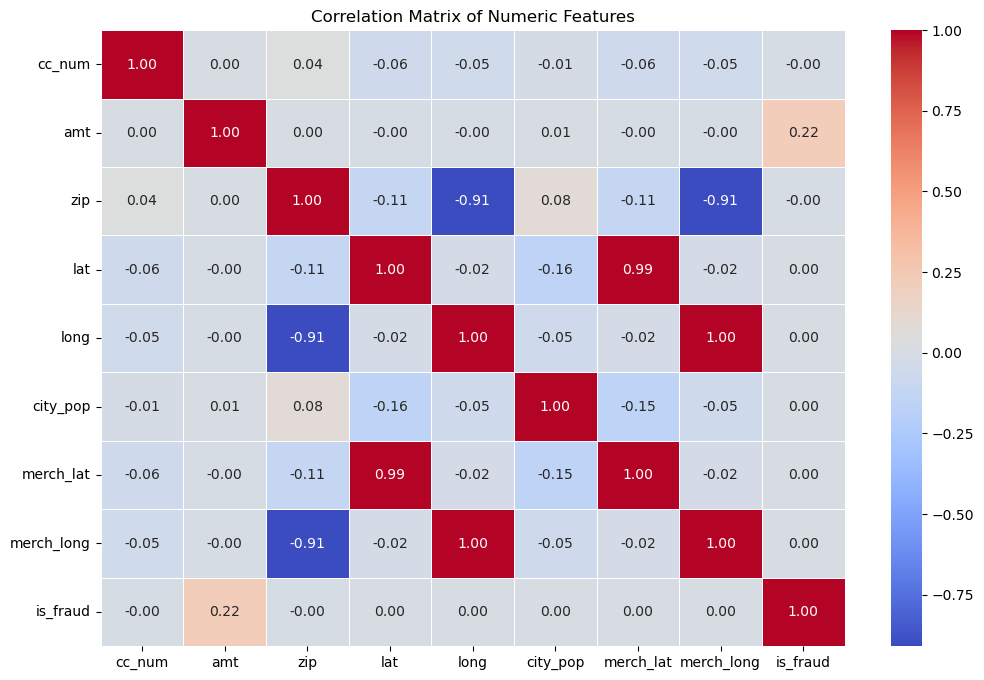

In [101]:
numeric_columns = train_df.select_dtypes(include=[np.number])

corr_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [102]:
train_df['dob'] = pd.to_datetime(train_df['dob'])
test_df['dob'] = pd.to_datetime(test_df['dob'])

In [103]:
from datetime import datetime


current_year = datetime.now().year
train_df['age'] = current_year - train_df['dob'].dt.year
test_df['age'] = current_year - test_df['dob'].dt.year


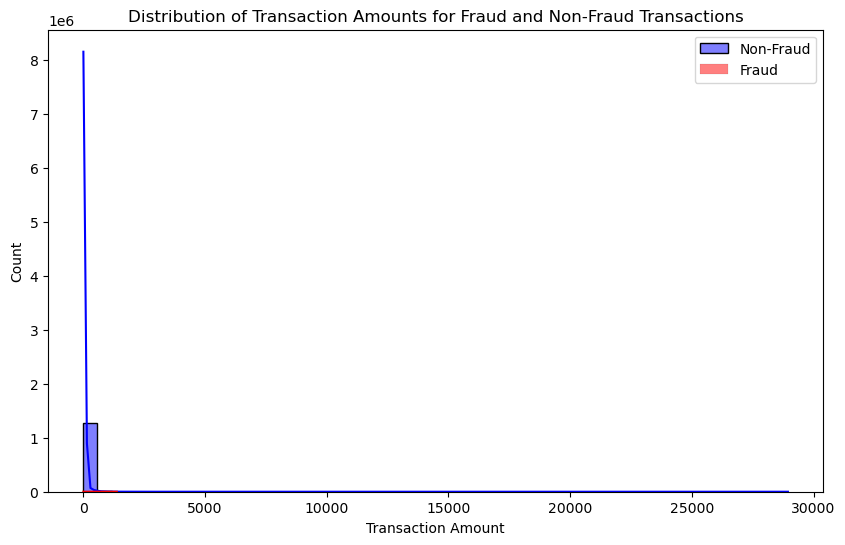

In [104]:
# Distribution of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(train_df[train_df['is_fraud'] == 0]['amt'], color='blue', bins=50, label='Non-Fraud', kde=True)
sns.histplot(train_df[train_df['is_fraud'] == 1]['amt'], color='red', bins=50, label='Fraud', kde=True)
plt.title('Distribution of Transaction Amounts for Fraud and Non-Fraud Transactions')
plt.xlabel('Transaction Amount')
plt.legend()
plt.show()

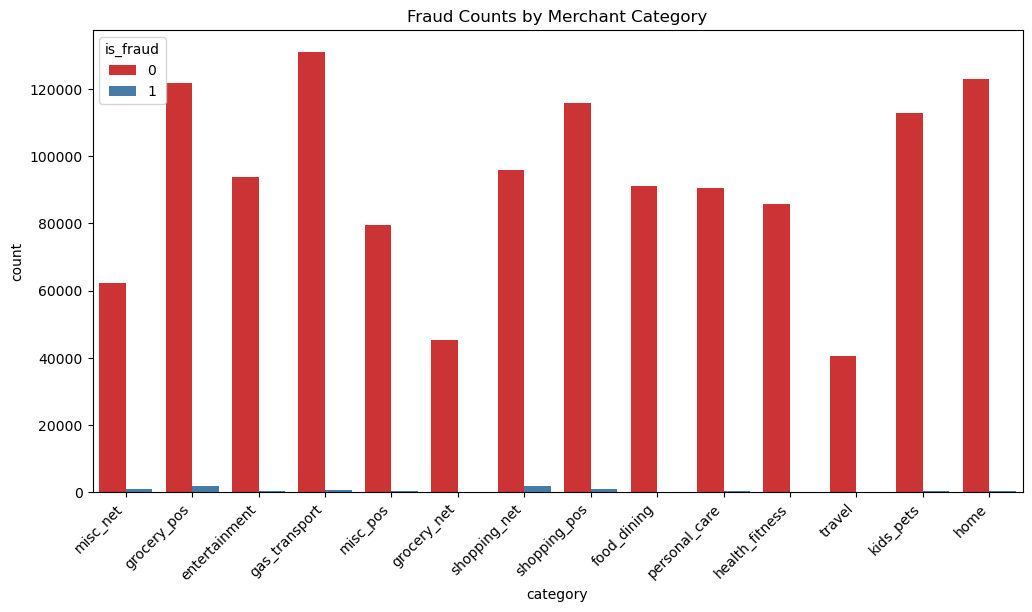

In [105]:
# Fraud Count by Merchant Category
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='category', hue='is_fraud', palette='Set1')
plt.xticks(rotation=45, ha='right')
plt.title('Fraud Counts by Merchant Category')
plt.show()

In [106]:
train_df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,zip,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,28654,36.0788,-81.1781,3495,1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,36
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,99160,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,46
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,ID,83252,42.1808,-112.2620,4154,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,62
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,59632,46.2306,-112.1138,1939,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,57
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,VA,24433,38.4207,-79.4629,99,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,UT,84735,37.7175,-112.4777,258,1961-11-24,440b587732da4dc1a6395aba5fb41669,36.841266,-111.690765,0,63
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,MD,21790,39.2667,-77.5101,100,1979-12-11,278000d2e0d2277d1de2f890067dcc0a,38.906881,-78.246528,0,45
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,NM,88325,32.9396,-105.8189,899,1967-08-30,483f52fe67fabef353d552c1e662974c,33.619513,-105.130529,0,57
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,SD,57756,43.3526,-102.5411,1126,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,42.788940,-103.241160,0,44


In [107]:
test_df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,zip,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,is_fraud,age
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,SC,29209,33.9659,-80.9355,333497,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,33.986391,-81.200714,0,56
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,UT,84002,40.3207,-110.4360,302,1990-01-17,324cc204407e99f51b0d6ca0055005e7,39.450498,-109.960431,0,34
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,11710,40.6729,-73.5365,34496,1970-10-21,c81755dbbbea9d5c77f094348a7579be,40.495810,-74.196111,0,54
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,FL,32780,28.5697,-80.8191,54767,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,28.812398,-80.883061,0,37
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,MI,49632,44.2529,-85.0170,1126,1955-07-06,57ff021bd3f328f8738bb535c302a31b,44.959148,-85.884734,0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,MO,63453,40.4931,-91.8912,519,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0,58
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,TX,77566,29.0393,-95.4401,28739,1999-12-27,2090647dac2c89a1d86c514c427f5b91,29.661049,-96.186633,0,25
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,WA,99323,46.1966,-118.9017,3684,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0,43
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,ID,83643,44.6255,-116.4493,129,1965-12-15,14392d723bb7737606b2700ac791b7aa,44.470525,-117.080888,0,59


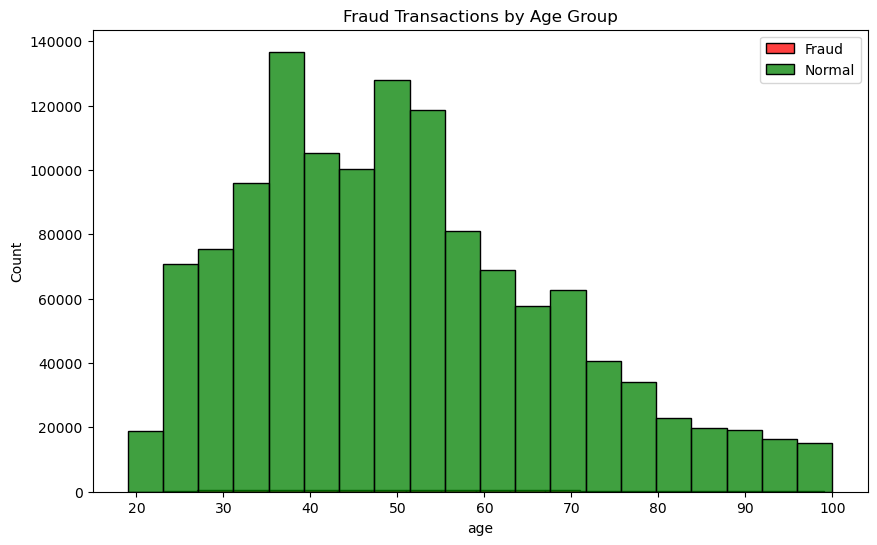

In [108]:
#Fraud Transactions by Age Group
plt.figure(figsize=(10,6))
sns.histplot(train_df[train_df['is_fraud']==1]['age'], bins=20, color='red', label='Fraud')
sns.histplot(train_df[train_df['is_fraud']==0]['age'], bins=20, color='green', label='Normal')
plt.title('Fraud Transactions by Age Group')
plt.legend()
plt.show()


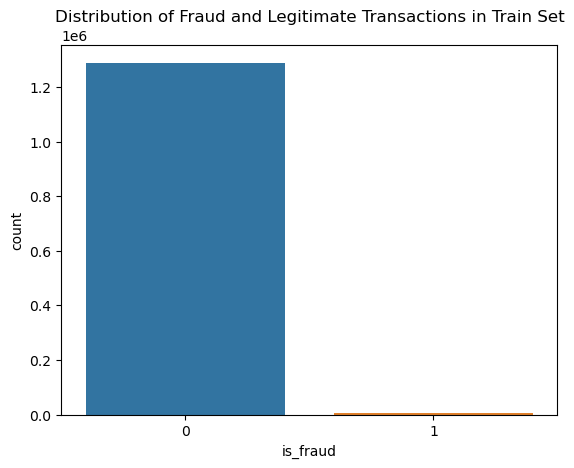

In [109]:
# Plot fraud vs legitimate transactions in train set
sns.countplot(x='is_fraud', data=train_df)
plt.title('Distribution of Fraud and Legitimate Transactions in Train Set')
plt.show()

In [110]:
fraud = train_df[train_df['is_fraud']==1]
normal = train_df[train_df['is_fraud']==0]

In [111]:
fraud.amt.describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

In [112]:
normal.amt.describe()

count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

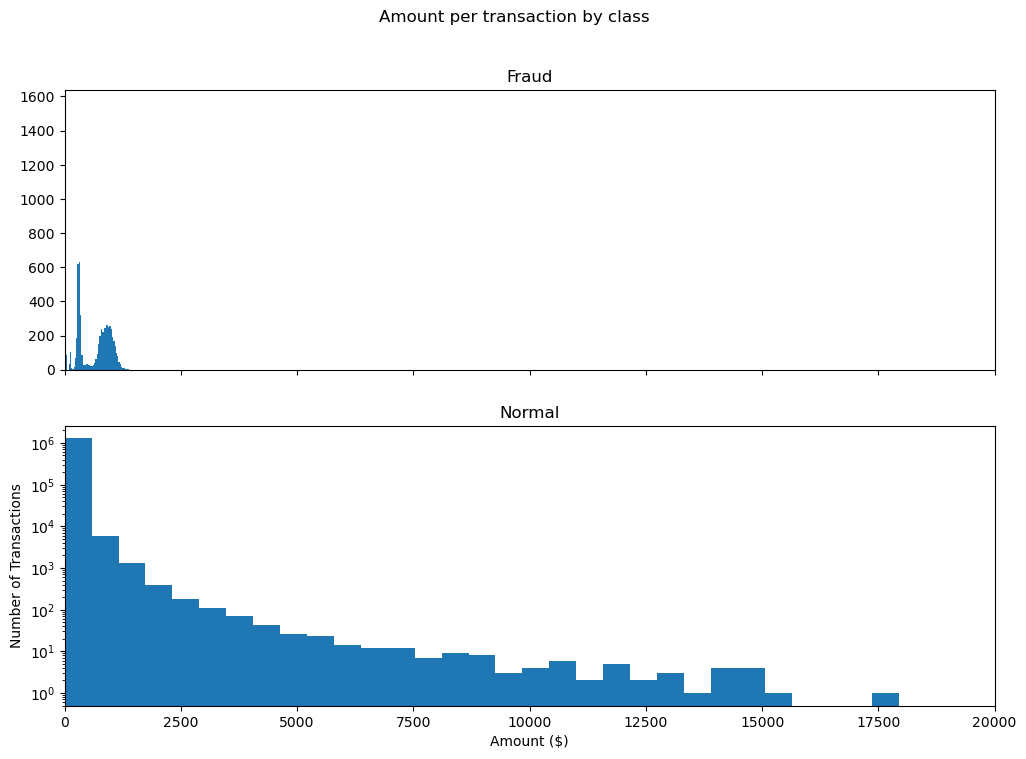

In [113]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(12, 8))
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.amt, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.amt, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

#transcation amount is very small for fraud data

/var/folders/x_/c_nxz25n75z3llbxjjb0s4k80000gn/T/ipykernel_9541/3843114078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['log_amt'] = np.log1p(fraud['amt'])
/var/folders/x_/c_nxz25n75z3llbxjjb0s4k80000gn/T/ipykernel_9541/3843114078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal['log_amt'] = np.log1p(normal['amt'])


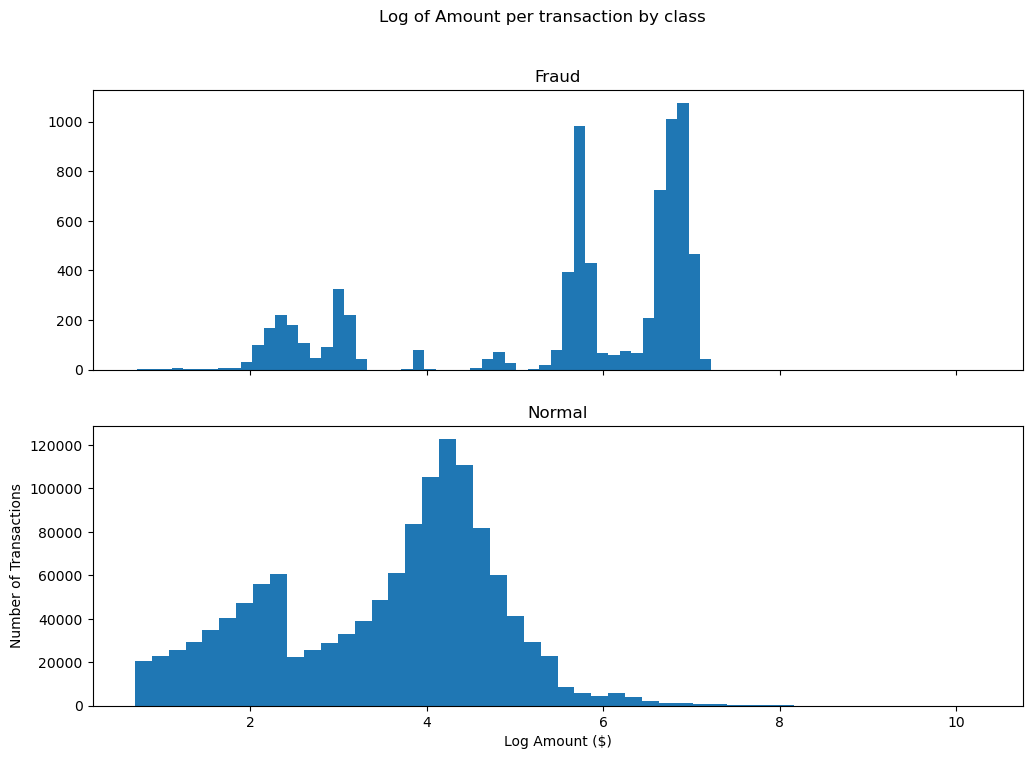

In [114]:
fraud['log_amt'] = np.log1p(fraud['amt'])
normal['log_amt'] = np.log1p(normal['amt'])

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))
f.suptitle('Log of Amount per transaction by class')
bins = 50
ax1.hist(fraud['log_amt'], bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal['log_amt'], bins=bins)
ax2.set_title('Normal')
plt.xlabel('Log Amount ($)')
plt.ylabel('Number of Transactions')
plt.show();

<Axes: xlabel='is_fraud', ylabel='amt'>

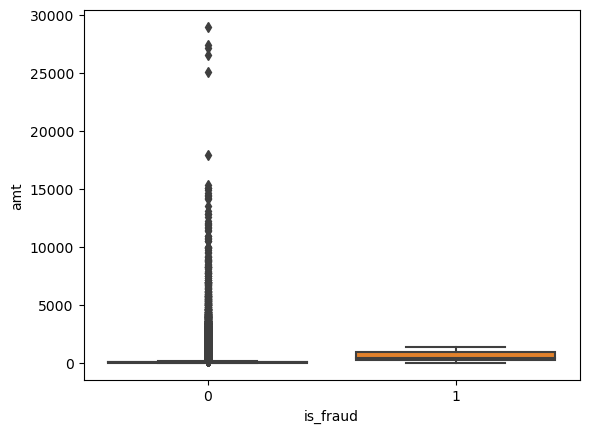

In [115]:
sns.boxplot(x='is_fraud', y='amt', data=train_df)

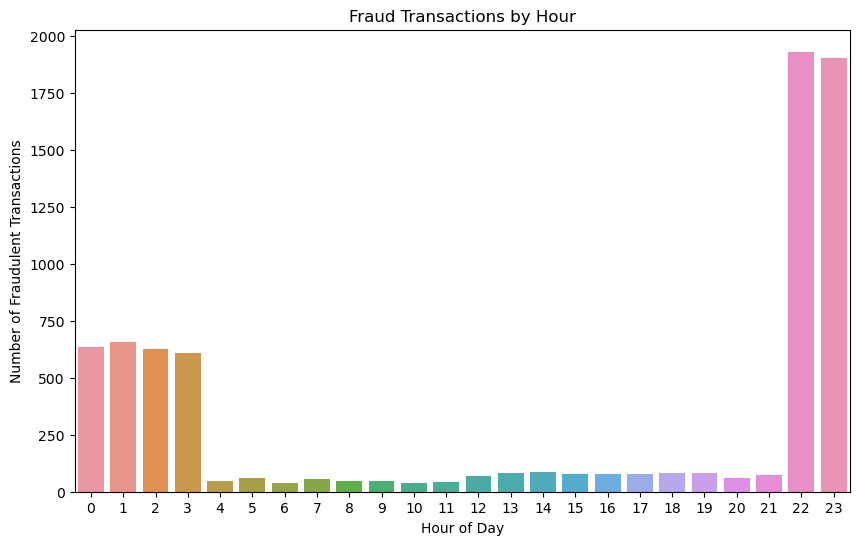

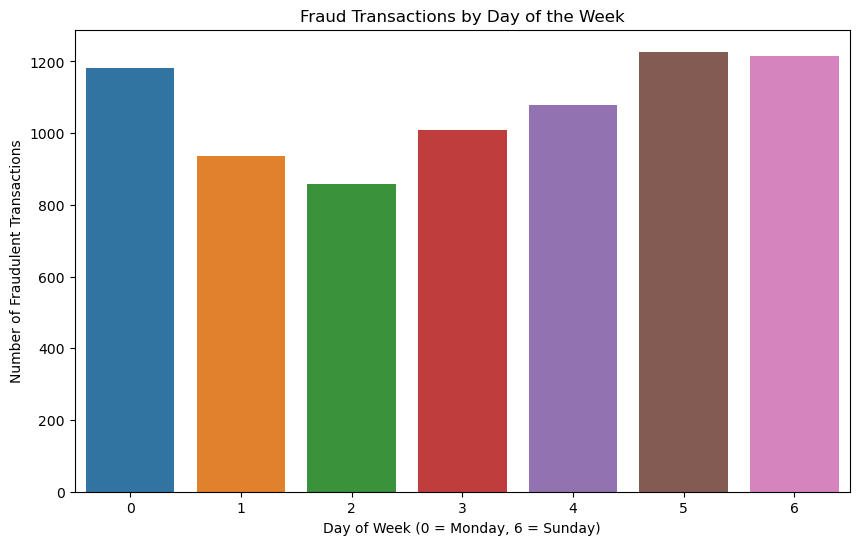

In [116]:
# Convert transaction date and time to datetime format
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])

# Extract hour and day of the week
train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
train_df['day_of_week'] = train_df['trans_date_trans_time'].dt.dayofweek

test_df['hour'] = test_df['trans_date_trans_time'].dt.hour
test_df['day_of_week'] = test_df['trans_date_trans_time'].dt.dayofweek

# Plot fraud transactions by hour
plt.figure(figsize=(10,6))
sns.countplot(x='hour', data=train_df[train_df['is_fraud']==1])
plt.title('Fraud Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

# Plot fraud transactions by day of the week
plt.figure(figsize=(10,6))
sns.countplot(x='day_of_week', data=train_df[train_df['is_fraud']==1])
plt.title('Fraud Transactions by Day of the Week')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

In [117]:
# now doing label encoding of non numeric features which here are gender, category, state
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#for train data
train_df['gender'] = le.fit_transform(train_df['gender'])
train_df['category'] = le.fit_transform(train_df['category'])
train_df['state'] = le.fit_transform(train_df['state'])

#for test data
le = LabelEncoder()
test_df['gender'] = le.fit_transform(test_df['gender'])
test_df['category'] = le.fit_transform(test_df['category'])
test_df['state'] = le.fit_transform(test_df['state'])

#Gender = f:0, m:1

In [118]:
train_df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,zip,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,is_fraud,age,hour,day_of_week
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",8,4.97,0,27,28654,36.0788,-81.1781,3495,1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,36,0,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",4,107.23,0,47,99160,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,46,0,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,0,220.11,1,13,83252,42.1808,-112.2620,4154,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,62,0,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",2,45.00,1,26,59632,46.2306,-112.1138,1939,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,57,0,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,9,41.96,1,45,24433,38.4207,-79.4629,99,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,38,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,0,15.56,1,44,84735,37.7175,-112.4777,258,1961-11-24,440b587732da4dc1a6395aba5fb41669,36.841266,-111.690765,0,63,12,6
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,1,51.70,1,20,21790,39.2667,-77.5101,100,1979-12-11,278000d2e0d2277d1de2f890067dcc0a,38.906881,-78.246528,0,45,12,6
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,1,105.93,1,32,88325,32.9396,-105.8189,899,1967-08-30,483f52fe67fabef353d552c1e662974c,33.619513,-105.130529,0,57,12,6
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",1,74.90,1,41,57756,43.3526,-102.5411,1126,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,42.788940,-103.241160,0,44,12,6


In [119]:
test_df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,zip,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,is_fraud,age,hour,day_of_week
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,10,2.86,1,39,29209,33.9659,-80.9355,333497,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,33.986391,-81.200714,0,56,12,6
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,10,29.84,0,43,84002,40.3207,-110.4360,302,1990-01-17,324cc204407e99f51b0d6ca0055005e7,39.450498,-109.960431,0,34,12,6
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",5,41.28,0,33,11710,40.6729,-73.5365,34496,1970-10-21,c81755dbbbea9d5c77f094348a7579be,40.495810,-74.196111,0,54,12,6
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,9,60.05,1,8,32780,28.5697,-80.8191,54767,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,28.812398,-80.883061,0,37,12,6
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,13,3.19,1,21,49632,44.2529,-85.0170,1126,1955-07-06,57ff021bd3f328f8738bb535c302a31b,44.959148,-85.884734,0,69,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,5,43.77,1,23,63453,40.4931,-91.8912,519,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0,58,23,3
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,7,111.84,1,42,77566,29.0393,-95.4401,28739,1999-12-27,2090647dac2c89a1d86c514c427f5b91,29.661049,-96.186633,0,25,23,3
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,7,86.88,0,46,99323,46.1966,-118.9017,3684,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0,43,23,3
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,13,7.99,1,12,83643,44.6255,-116.4493,129,1965-12-15,14392d723bb7737606b2700ac791b7aa,44.470525,-117.080888,0,59,23,3


In [120]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  int64         
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  int64         
 6   state                  1296675 non-null  int64         
 7   zip                    1296675 non-null  int64         
 8   lat                    1296675 non-null  float64       
 9   long                   1296675 non-null  float64       
 10  city_pop               1296675 non-null  int64         
 11  dob                    1296675 non-null  datetime64[ns]
 12  trans_num              12966

In [121]:
# Dropping more irrelevant columns
train_df = train_df.drop(columns=['trans_num','cc_num','merchant'])
test_df = test_df.drop(columns=['trans_num','cc_num','merchant'])

In [122]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  int64         
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  int64         
 4   state                  1296675 non-null  int64         
 5   zip                    1296675 non-null  int64         
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   dob                    1296675 non-null  datetime64[ns]
 10  merch_lat              1296675 non-null  float64       
 11  merch_long             1296675 non-null  float64       
 12  is_fraud               12966

In [123]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  int64         
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  int64         
 4   state                  555719 non-null  int64         
 5   zip                    555719 non-null  int64         
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   dob                    555719 non-null  datetime64[ns]
 10  merch_lat              555719 non-null  float64       
 11  merch_long             555719 non-null  float64       
 12  is_fraud               555719 non-null  int6

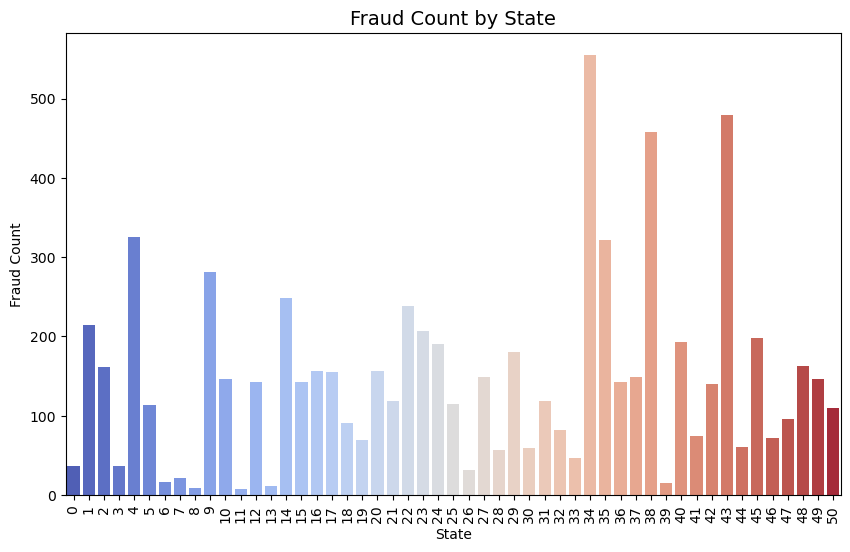

In [124]:
fraud_by_state = train_df[train_df['is_fraud'] == 1]['state'].value_counts()
#plot fraud count by state
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_state.index, y=fraud_by_state.values, palette='coolwarm')
plt.title('Fraud Count by State', fontsize=14)
plt.xlabel('State')
plt.ylabel('Fraud Count')
plt.xticks(rotation=90)
plt.show()

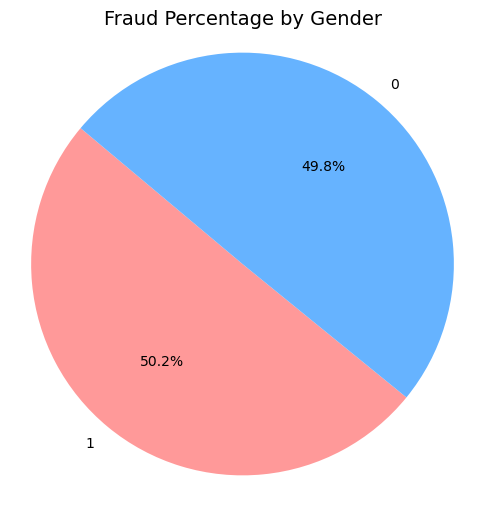

In [125]:
# plot Fraud by Gender
fraud_gender = train_df[train_df['is_fraud'] == 1]['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(fraud_gender, labels=fraud_gender.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Fraud Percentage by Gender', fontsize=14)
plt.axis('equal')
plt.show()

#female:0 and male:1

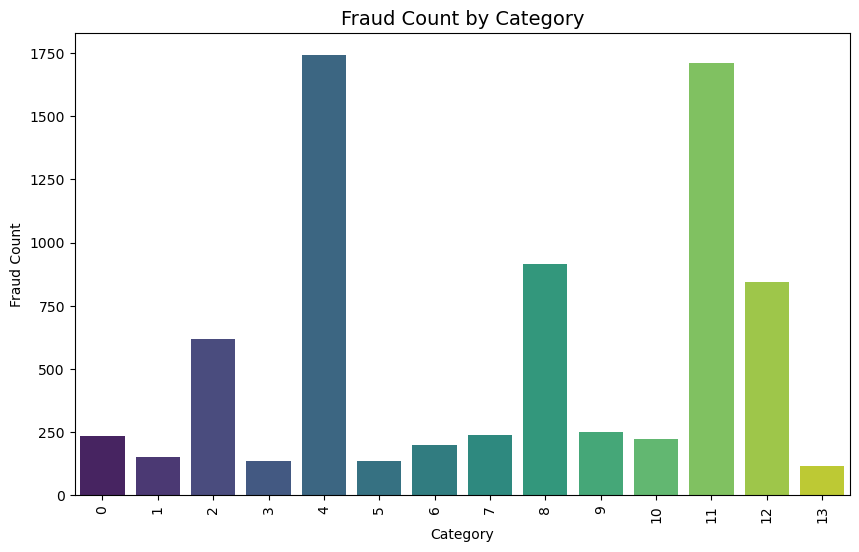

In [126]:
# Fraud by Category
fraud_category = train_df[train_df['is_fraud'] == 1]['category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_category.index, y=fraud_category.values, palette='viridis')
plt.title('Fraud Count by Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Fraud Count')
plt.xticks(rotation=90)
plt.show()


In [127]:
# Dropping more irrelevant columns
train_df = train_df.drop(columns=['trans_date_trans_time','dob'])
test_df = test_df.drop(columns=['trans_date_trans_time','dob'])

In [128]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   category     1296675 non-null  int64  
 1   amt          1296675 non-null  float64
 2   gender       1296675 non-null  int64  
 3   state        1296675 non-null  int64  
 4   zip          1296675 non-null  int64  
 5   lat          1296675 non-null  float64
 6   long         1296675 non-null  float64
 7   city_pop     1296675 non-null  int64  
 8   merch_lat    1296675 non-null  float64
 9   merch_long   1296675 non-null  float64
 10  is_fraud     1296675 non-null  int64  
 11  age          1296675 non-null  int64  
 12  hour         1296675 non-null  int64  
 13  day_of_week  1296675 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 138.5 MB


In [129]:
train_df

,category,amt,gender,state,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,age,hour,day_of_week
0,8,4.97,0,27,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0,36,0,1
1,4,107.23,0,47,99160,48.8878,-118.2105,149,49.159047,-118.186462,0,46,0,1
2,0,220.11,1,13,83252,42.1808,-112.2620,4154,43.150704,-112.154481,0,62,0,1
3,2,45.00,1,26,59632,46.2306,-112.1138,1939,47.034331,-112.561071,0,57,0,1
4,9,41.96,1,45,24433,38.4207,-79.4629,99,38.674999,-78.632459,0,38,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,1,44,84735,37.7175,-112.4777,258,36.841266,-111.690765,0,63,12,6
1296671,1,51.70,1,20,21790,39.2667,-77.5101,100,38.906881,-78.246528,0,45,12,6
1296672,1,105.93,1,32,88325,32.9396,-105.8189,899,33.619513,-105.130529,0,57,12,6
1296673,1,74.90,1,41,57756,43.3526,-102.5411,1126,42.788940,-103.241160,0,44,12,6


In [130]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   category     555719 non-null  int64  
 1   amt          555719 non-null  float64
 2   gender       555719 non-null  int64  
 3   state        555719 non-null  int64  
 4   zip          555719 non-null  int64  
 5   lat          555719 non-null  float64
 6   long         555719 non-null  float64
 7   city_pop     555719 non-null  int64  
 8   merch_lat    555719 non-null  float64
 9   merch_long   555719 non-null  float64
 10  is_fraud     555719 non-null  int64  
 11  age          555719 non-null  int64  
 12  hour         555719 non-null  int64  
 13  day_of_week  555719 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 59.4 MB


In [131]:
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']


In [132]:
X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']

In [133]:
X_train

,category,amt,gender,state,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day_of_week
0,8,4.97,0,27,28654,36.0788,-81.1781,3495,36.011293,-82.048315,36,0,1
1,4,107.23,0,47,99160,48.8878,-118.2105,149,49.159047,-118.186462,46,0,1
2,0,220.11,1,13,83252,42.1808,-112.2620,4154,43.150704,-112.154481,62,0,1
3,2,45.00,1,26,59632,46.2306,-112.1138,1939,47.034331,-112.561071,57,0,1
4,9,41.96,1,45,24433,38.4207,-79.4629,99,38.674999,-78.632459,38,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,1,44,84735,37.7175,-112.4777,258,36.841266,-111.690765,63,12,6
1296671,1,51.70,1,20,21790,39.2667,-77.5101,100,38.906881,-78.246528,45,12,6
1296672,1,105.93,1,32,88325,32.9396,-105.8189,899,33.619513,-105.130529,57,12,6
1296673,1,74.90,1,41,57756,43.3526,-102.5411,1126,42.788940,-103.241160,44,12,6


# Using SMOTE to balance dataset

In [134]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled_test, y_resampled_test = smote.fit_resample(X_test, y_test)

In [135]:
from sklearn.model_selection import train_test_split

X_train_smote, X_val_smote, y_train_smote, y_val_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Random Forest on SMOTE resampled data 

In [136]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_smote, y_train_smote)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [137]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_val_smote)
print(classification_report(y_val_smote, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257186
           1       1.00      1.00      1.00    258482

    accuracy                           1.00    515668
   macro avg       1.00      1.00      1.00    515668
weighted avg       1.00      1.00      1.00    515668



In [138]:
y_train_smote

2405787    1
1614448    1
1366567    1
2138973    1
356496     0
          ..
110268     0
1692743    1
2356330    1
2229084    1
2219110    1
Name: is_fraud, Length: 2062670, dtype: int64

In [139]:
y_val_smote

404196     0
137356     0
2232713    1
1000863    0
2411018    1
          ..
546866     0
419961     0
1161562    0
2140351    1
2525643    1
Name: is_fraud, Length: 515668, dtype: int64

In [144]:
y_pred_test = model.predict(X_resampled_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_resampled_test, y_pred_test))
print(confusion_matrix(y_resampled_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89    553574
           1       1.00      0.75      0.85    553574

    accuracy                           0.87   1107148
   macro avg       0.90      0.87      0.87   1107148
weighted avg       0.90      0.87      0.87   1107148

[[551567   2007]
 [139457 414117]]


# Random Forest On Normal Data

In [145]:
X = train_df.drop(['is_fraud'], axis=1)
y = train_df['is_fraud']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler

# Selecting only numerical columns
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()

X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val_scaled[numerical_columns] = scaler.transform(X_val[numerical_columns])


In [146]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   category     1296675 non-null  int64  
 1   amt          1296675 non-null  float64
 2   gender       1296675 non-null  int64  
 3   state        1296675 non-null  int64  
 4   zip          1296675 non-null  int64  
 5   lat          1296675 non-null  float64
 6   long         1296675 non-null  float64
 7   city_pop     1296675 non-null  int64  
 8   merch_lat    1296675 non-null  float64
 9   merch_long   1296675 non-null  float64
 10  is_fraud     1296675 non-null  int64  
 11  age          1296675 non-null  int64  
 12  hour         1296675 non-null  int64  
 13  day_of_week  1296675 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 138.5 MB


In [147]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   category     555719 non-null  int64  
 1   amt          555719 non-null  float64
 2   gender       555719 non-null  int64  
 3   state        555719 non-null  int64  
 4   zip          555719 non-null  int64  
 5   lat          555719 non-null  float64
 6   long         555719 non-null  float64
 7   city_pop     555719 non-null  int64  
 8   merch_lat    555719 non-null  float64
 9   merch_long   555719 non-null  float64
 10  is_fraud     555719 non-null  int64  
 11  age          555719 non-null  int64  
 12  hour         555719 non-null  int64  
 13  day_of_week  555719 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 59.4 MB


In [148]:
# Check for non-numeric columns
non_numeric_columns = X_train_scaled.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns if they are not useful
X_train_scaled = X_train_scaled.drop(non_numeric_columns, axis=1)
X_val_scaled = X_val_scaled.drop(non_numeric_columns, axis=1)

# Now, fit the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)


Non-numeric columns: Index([], dtype='object')


RandomForestClassifier(random_state=42)

In [149]:
from sklearn.metrics import classification_report, roc_auc_score
y_pred = clf.predict(X_val_scaled)
print(classification_report(y_val, y_pred))
auc = roc_auc_score(y_val, clf.predict_proba(X_val_scaled)[:, 1])
print(f'ROC AUC: {auc:.2f}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.97      0.76      0.86      1520

    accuracy                           1.00    259335
   macro avg       0.99      0.88      0.93    259335
weighted avg       1.00      1.00      1.00    259335

ROC AUC: 0.99


In [150]:
importances = clf.feature_importances_
feature_names = X_train_scaled.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

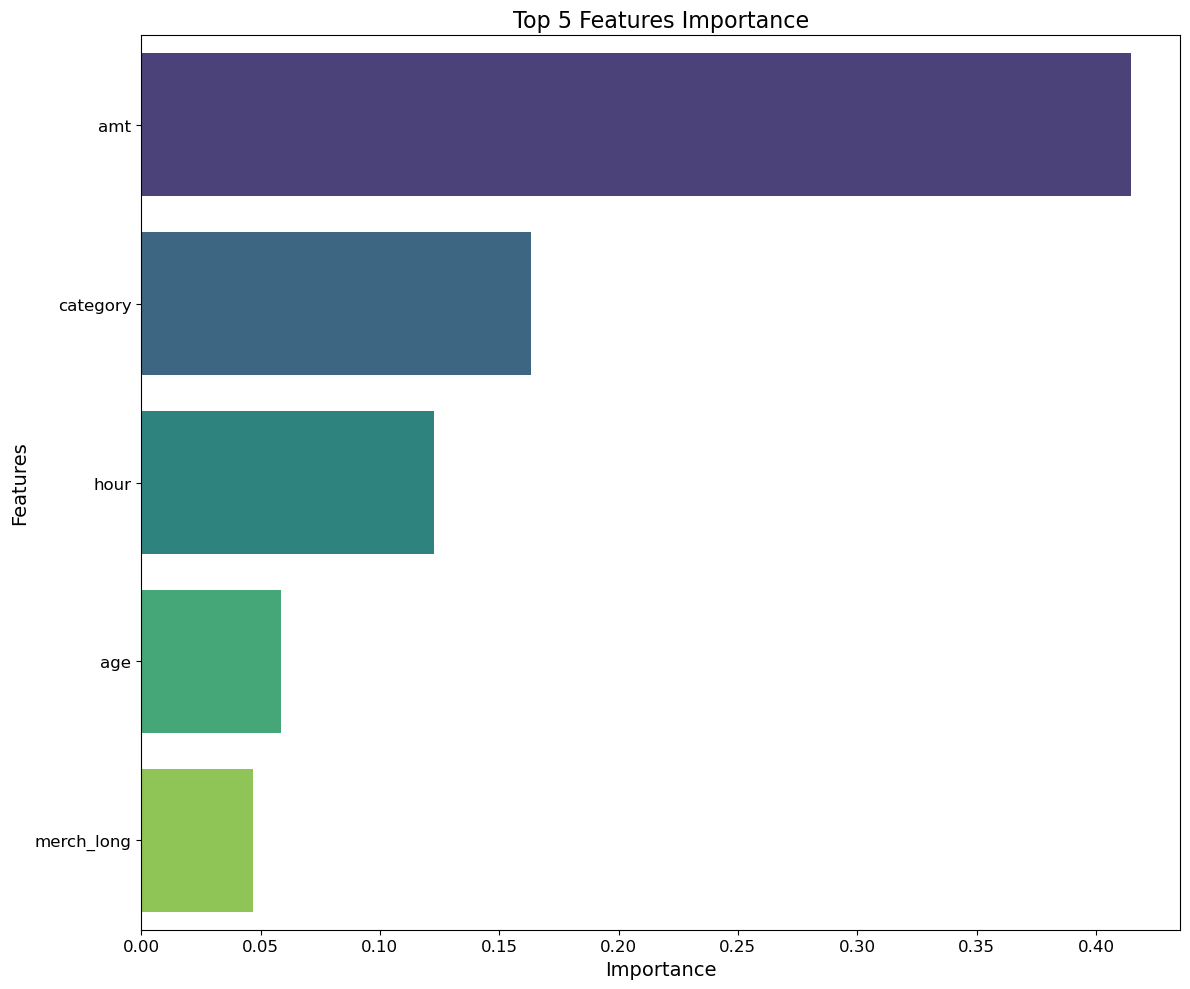

In [151]:
top_n = 5  # checking for top 5 important features
top_features = feature_importances.head(top_n)

plt.figure(figsize=(12, 10))
sns.barplot(x=top_features, y=top_features.index, palette='viridis')

plt.title(f'Top {top_n} Features Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [152]:
x_test_df=test_df.drop(['is_fraud'],axis=1)
y_test_df=test_df['is_fraud']

In [153]:
from sklearn.metrics import classification_report, roc_auc_score

X_test_scaled = x_test_df.copy()
X_test_scaled[numerical_columns] = scaler.transform(x_test_df[numerical_columns])

y_pred_test = clf.predict(X_test_scaled)
y_pred_proba_test = clf.predict_proba(X_test_scaled)[:, 1]


if 'y_test_df' in globals():
    print("Classification Report:")
    print(classification_report(y_test_df, y_pred_test))
    
    auc = roc_auc_score(y_test_df, y_pred_proba_test)
    print(f'ROC AUC: {auc:.2f}')
else:
    print("True labels are not available for evaluation.")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.95      0.71      0.81      2145

    accuracy                           1.00    555719
   macro avg       0.97      0.86      0.91    555719
weighted avg       1.00      1.00      1.00    555719

ROC AUC: 0.97
